In [2]:
from __future__ import print_function
import pyemma
pyemma.__version__

'2.5.2'

In [3]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt

In [5]:
def save_figure(name):
    # change these if wanted
    do_save = False
    fig_dir = './figs/'
    if do_save:
        savefig(fig_dir + name, bbox_inches='tight')

In [6]:
def plot_sampled_function(xall, yall, zall, ax=None, nbins=100, nlevels=20, cmap=cm.bwr, cbar=True, cbar_label=None):
    # histogram data
    xmin = np.min(xall)
    xmax = np.max(xall)
    dx = (xmax - xmin) / float(nbins)
    ymin = np.min(yall)
    ymax = np.max(yall)
    dy = (ymax - ymin) / float(nbins)
    # bin data
    eps = x
    xbins = np.linspace(xmin - 0.5*dx, xmax + 0.5*dx, num=nbins)
    ybins = np.linspace(ymin - 0.5*dy, ymax + 0.5*dy, num=nbins)
    xI = np.digitize(xall, xbins)
    yI = np.digitize(yall, ybins)
    # result
    z = np.zeros((nbins, nbins))
    N = np.zeros((nbins, nbins))
    # average over bins
    for t in range(len(xall)):
        z[xI[t], yI[t]] += zall[t]
        N[xI[t], yI[t]] += 1.0
    with warnings.catch_warnings() as cm:
        warnings.simplefilter('ignore')
        z /= N
    # do a contour plot
    extent = [xmin, xmax, ymin, ymax]
    if ax is None:
        ax = gca()
    ax.contourf(z.T, 100, extent=extent, cmap=cmap)
    if cbar:
        cbar = plt.colorbar()
        if cbar_label is not None:
            cbar.ax.set_ylabel(cbar_label)

    return ax

In [7]:
def plot_sampled_density(xall, yall, zall, ax=None, nbins=100, cmap=cm.Blues, cbar=True, cbar_label=None):
    return plot_sampled_function(xall, yall, zall, ax=ax, nbins=nbins, cmap=cmap, cbar=cbar, cbar_label=cbar_label)

In [10]:
from glob import glob
traj_list = glob("*SC*.xtc")
topfile="md.loop_SC_start.gro"

In [118]:
feat = coor.featurizer(topfile)
feat.add_backbone_torsions(cossin=True)
feat.add_sidechain_torsions(which=['chi1'])
feat.add_distances_ca()

# n.b very time intensive
#feat.add_distances(feat.pairs(feat.select_Heavy()))
# describe the features
# feat.describe()

In [119]:
feat.dimension()

938

In [120]:
inp = coor.source(traj_list, feat)
print('number of trajectories = ',inp.number_of_trajectories())
print('trajectory length = ',inp.trajectory_length(0))
print('trajectory time step = ',500.0 / (inp.trajectory_length(0)-1),'ns')
print('number of dimension = ',inp.dimension())

HBox(children=(HBox(children=(Label(value='Obtaining file info'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

number of trajectories =  5
trajectory length =  5001
trajectory time step =  0.1 ns
number of dimension =  938


In [121]:
tica_obj = coor.tica(inp, lag=20, var_cutoff=0.9, kinetic_map=True)
print('TICA dimension ', tica_obj.dimension())

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

TICA dimension  253


In [122]:
tica_obj.cumvar

array([ 0.01054149,  0.02108228,  0.03161666,  0.04214145,  0.05262248,
        0.06305947,  0.07344403,  0.08379291,  0.09406757,  0.10421226,
        0.11430409,  0.12438004,  0.13438256,  0.14428593,  0.15411942,
        0.163917  ,  0.1736472 ,  0.18327481,  0.19287563,  0.20234913,
        0.21169376,  0.22089663,  0.23005352,  0.23912672,  0.24807436,
        0.25700303,  0.26584708,  0.27459024,  0.28325829,  0.29186302,
        0.30043596,  0.30891368,  0.31734632,  0.32567025,  0.33389834,
        0.34201315,  0.3499256 ,  0.35775066,  0.36547644,  0.37317219,
        0.38067441,  0.38810238,  0.39551088,  0.40279406,  0.41005799,
        0.41719339,  0.42428727,  0.43129375,  0.43822486,  0.44509808,
        0.4518804 ,  0.45861598,  0.46522373,  0.47176462,  0.4782186 ,
        0.48447612,  0.4904808 ,  0.49643225,  0.5023106 ,  0.50814877,
        0.513799  ,  0.51936273,  0.52487853,  0.53034478,  0.53572356,
        0.54103062,  0.54622514,  0.55138785,  0.55645188,  0.56

In [123]:
# here we do a little trick to ensure that eigenvectors always have the same sign structure.
# That's irrelevant to the analysis and just nicer plots - you can ignore it.
for i in range(2):
    if tica_obj.eigenvectors[0, i] > 0:
        tica_obj.eigenvectors[:, i] *= -1

In [124]:
Y = tica_obj.get_output() # get tica coordinates
print('number of trajectories = ', np.shape(Y)[0])
print('number of frames = ', np.shape(Y)[1])
print('number of dimensions = ',np.shape(Y)[2])

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

number of trajectories =  5
number of frames =  5001
number of dimensions =  253


In [125]:
def plot_labels(ax=None):
    if ax is None:
        ax = gca()
    ax.text(-2, -4.7, '1', fontsize=20, color='black')
    ax.text(-1.2, -5, '2', fontsize=20, color='black')
    ax.text(-4.2, 1.5, '3', fontsize=20, color='black')
    ax.text(-0.1, 0, '4', fontsize=20, color='white')

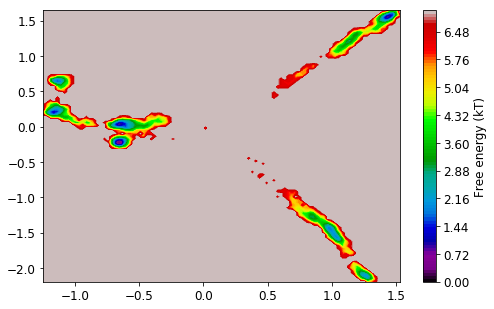

In [126]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1]);

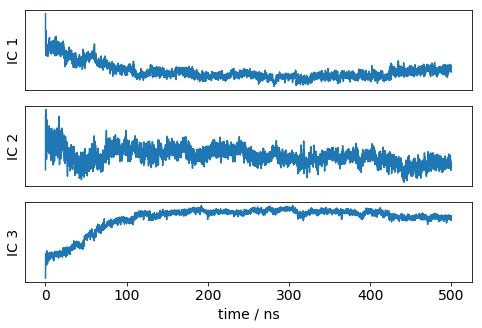

In [127]:
matplotlib.rcParams.update({'font.size': 14})
dt = 0.1
figure(figsize(8,5))
ax1=plt.subplot(311)
x = dt*np.arange(Y[0].shape[0])
plot(x, Y[0][:,0]); ylabel('IC 1'); xticks([]); yticks(np.arange(-1, 1, 2))
ax1=plt.subplot(312)
plot(x, Y[0][:,1]); ylabel('IC 2'); xticks([]);  yticks(np.arange(-1, 1, 2))
ax1=plt.subplot(313)
plot(x, Y[0][:,2]); xlabel('time / ns'); ylabel('IC 3'); yticks(np.arange(-1, 1, 2))
save_figure('ic_trajs.png')

In [128]:
n_clusters=75
clustering = coor.cluster_uniform_time(Y,k=n_clusters)

In [129]:
dtrajs = clustering.dtrajs

HBox(children=(HBox(children=(Label(value='getting output of UniformTimeClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=5), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

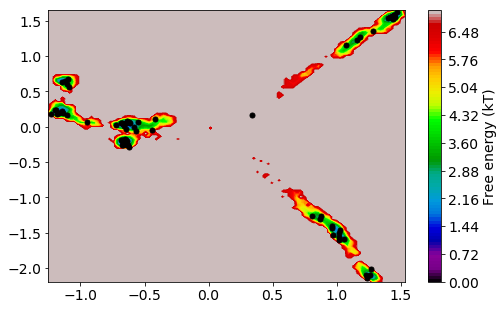

In [130]:
mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = clustering.clustercenters[:,0]
cc_y = clustering.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

In [131]:
its = msm.timescales_msm(dtrajs, lags=200, nits=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=13), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

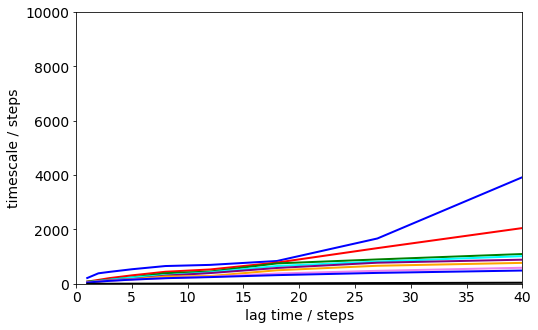

In [132]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
xlim(0, 40); ylim(0, 10000);

In [133]:
its = msm.timescales_msm(dtrajs, lags=100, nits=8, errors='bayes', n_jobs=-1)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=12), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

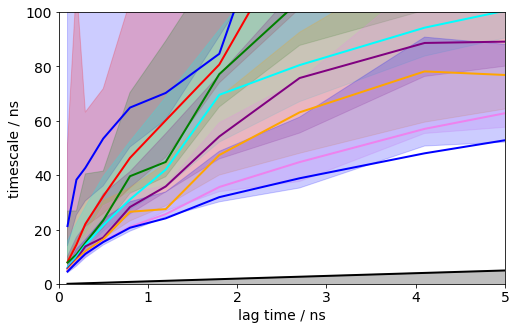

In [134]:
figure(figsize(8,5))
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, show_mean=False, ylog=False, dt=0.1, units='ns', linewidth=2)
xlim(0, 5); ylim(0.1,100);
save_figure('its.png')

In [135]:
msm_lag = 25
M = msm.estimate_markov_model(dtrajs, msm_lag)
print('fraction of states used = ', M.active_state_fraction)
print('fraction of counts used = ', M.active_count_fraction)

fraction of states used =  1.0
fraction of counts used =  1.0


In [136]:
# test MSM
M = msm.bayesian_markov_model(dtrajs, msm_lag)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [137]:
ck = M.cktest(4, mlags=11, err_est=False)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=10), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

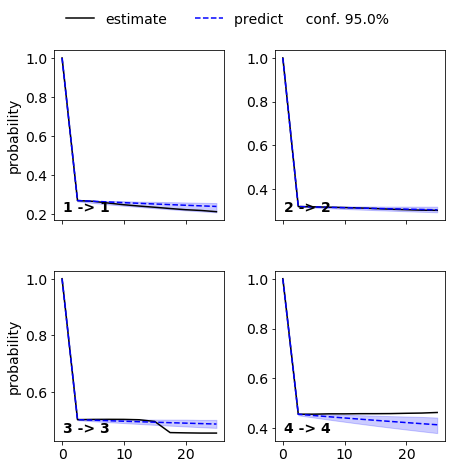

In [138]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_cktest(ck, diag=True, figsize=(7,7), layout=(2,2), padding_top=0.1, y01=False, padding_between=0.3, dt=0.1, units='ns')
save_figure('cktest.png')

In [139]:
# ... therefore we take the statistical weight of each simulation timestep (also available from the MSM object)
# and use that to create a contour plot
xall = np.vstack(Y)[:,0]
yall = np.vstack(Y)[:,1]
W = np.concatenate(M.trajectory_weights())

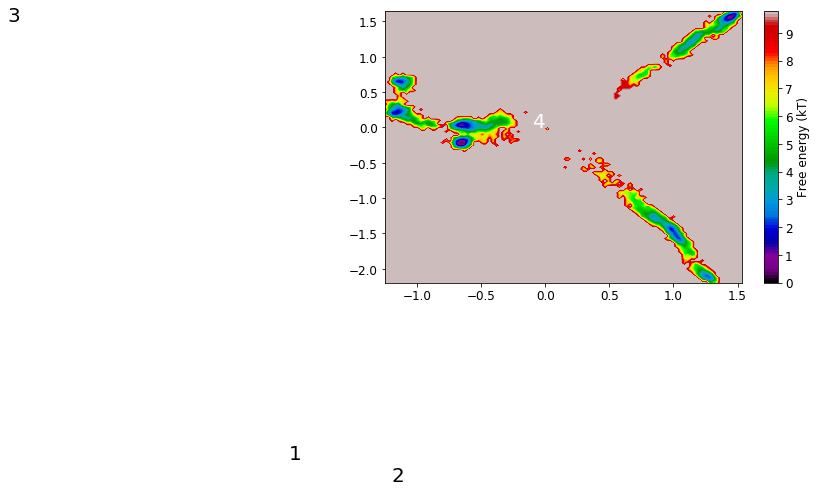

In [143]:
# TODO: make this an MSM-weighted free energy plot
matplotlib.rcParams.update({'font.size': 12})
mplt.plot_free_energy(xall, yall, weights=W)
plot_labels()
save_figure('free_energy_msm.png')